In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df = pd.read_csv('./ML-EdgeIIoT-dataset.csv')


C:\Users\Admin\AppData\Local\Temp\ipykernel_15460\1151900176.py:1: DtypeWarning: Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./ML-EdgeIIoT-dataset.csv')


In [102]:
df.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM


[Text(0.5, 1.0, 'Attack Count')]

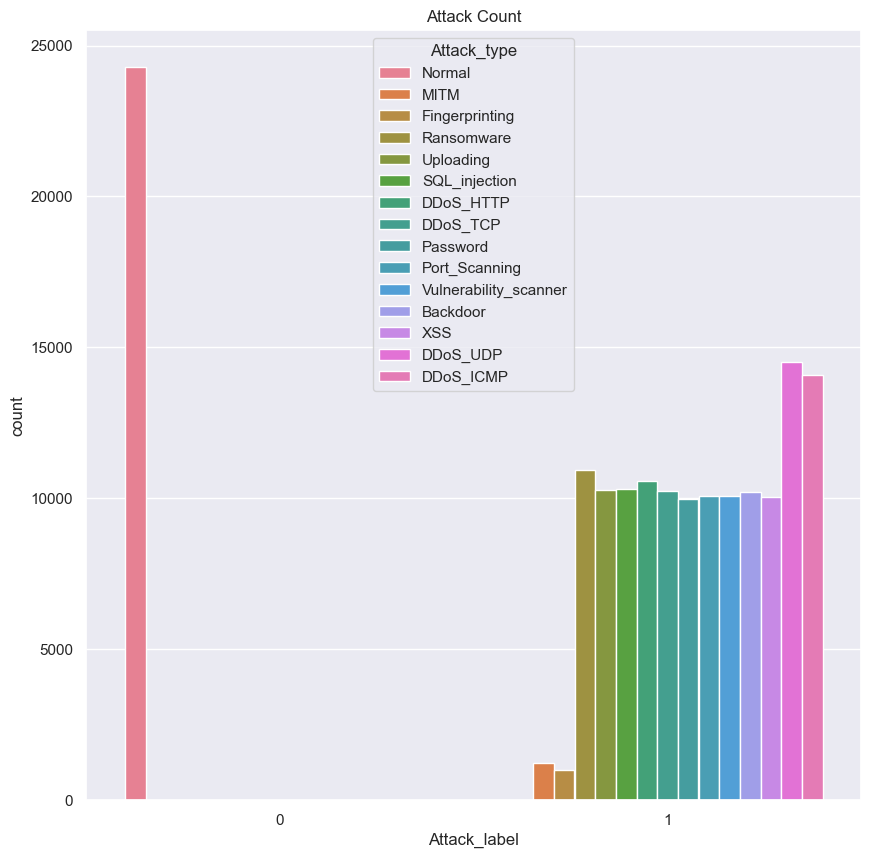

In [104]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x="Attack_label", hue="Attack_type").set(title='Attack Count')

[Text(0.5, 1.0, 'Attacks and subtypes')]

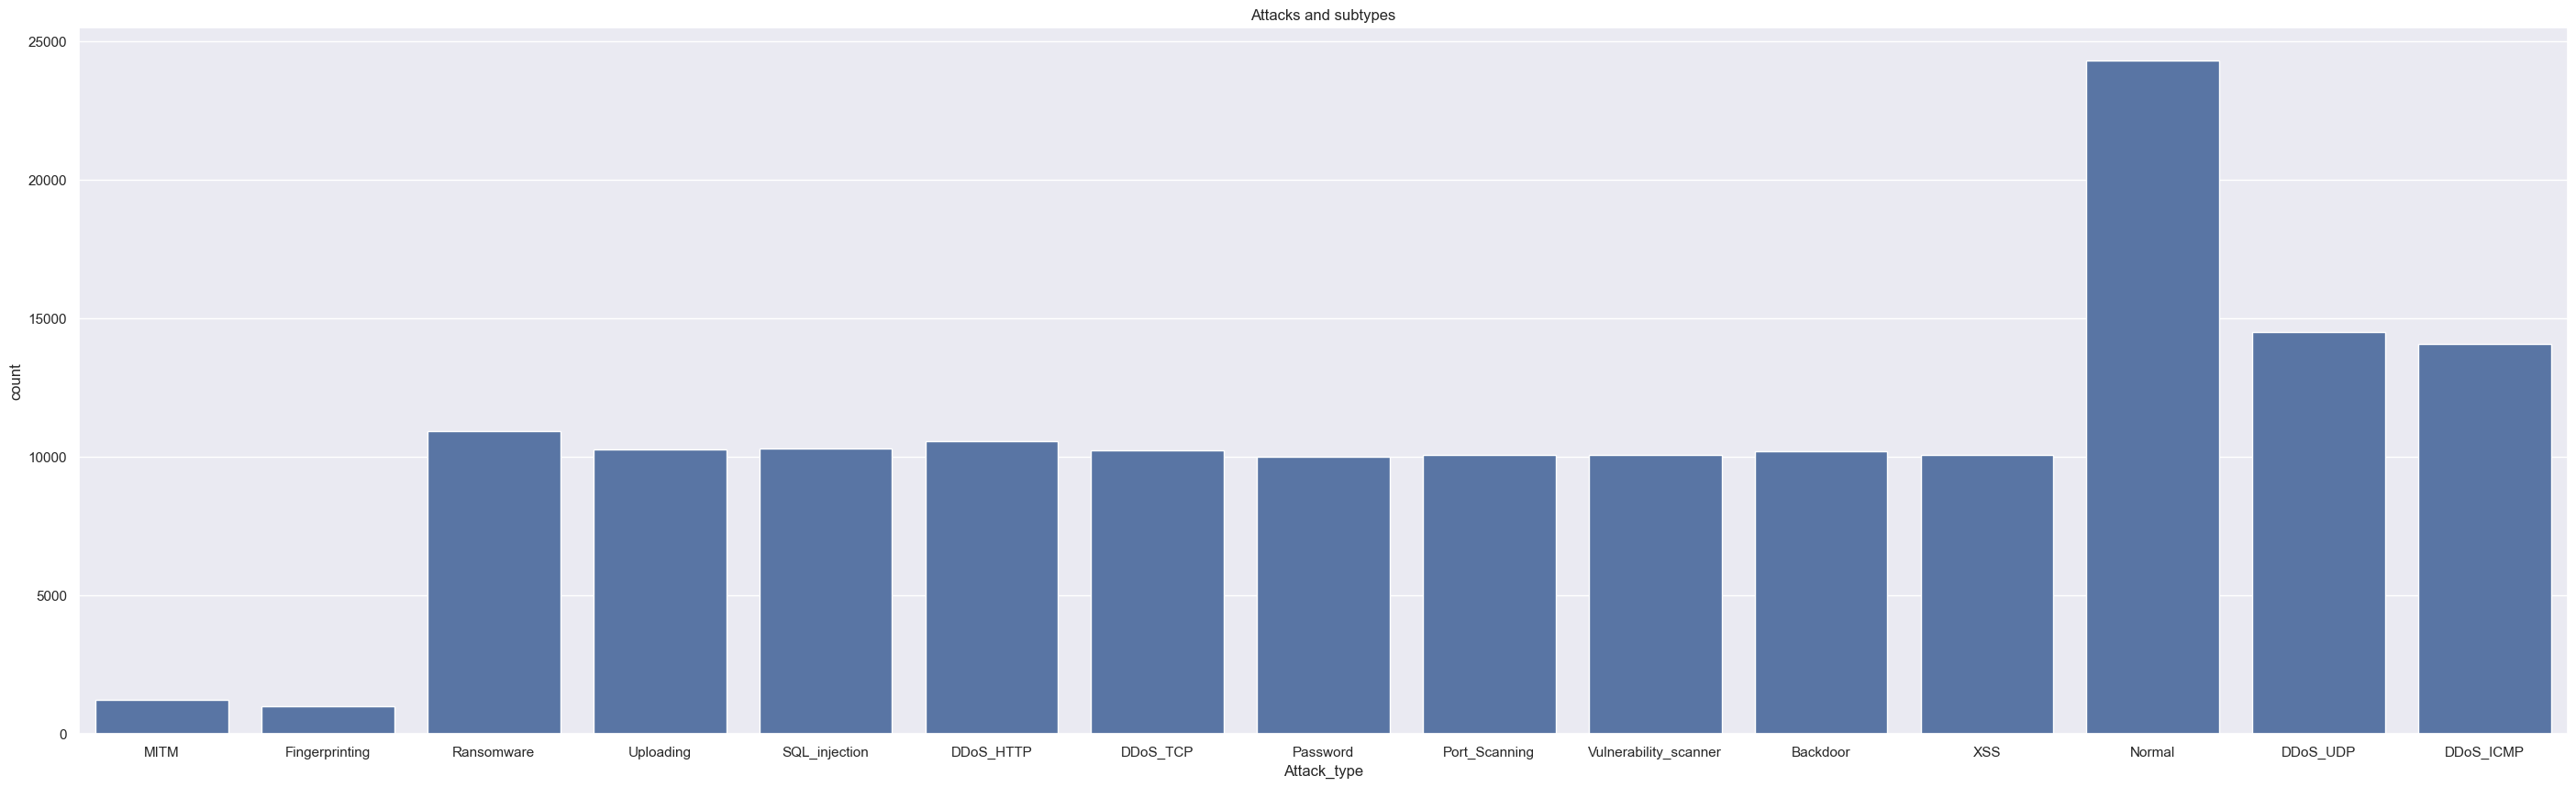

In [106]:
plt.figure(figsize=(35,10))
sns.countplot(x=df['Attack_type']).set(title='Attacks and subtypes')

In [108]:
# Import necessary libraries
from sklearn.utils import shuffle

# Define a list of columns to be dropped from the DataFrame
drop_columns = ["Attack_type", "frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4",
                "arp.dst.proto_ipv4", "http.file_data", "http.request.full_uri", "icmp.transmit_timestamp",
                "http.request.uri.query", "tcp.options", "tcp.payload", "tcp.srcport",
                "tcp.dstport", "udp.port", "mqtt.msg"]

# Drop the specified columns from the DataFrame
df.drop(drop_columns, axis=1, inplace=True)

# Remove rows with any missing (NaN) values from the DataFrame
df.dropna(axis=0, how='any', inplace=True)

# Remove duplicate rows from the DataFrame, keeping only the first occurrence
df.drop_duplicates(subset=None, keep="first", inplace=True)

# Shuffle the rows of the DataFrame to introduce randomness
df = shuffle(df)

# Check for missing values in the DataFrame and display the counts per column
df.isna().sum()

# Display the count of unique values in the 'Attack_label' column
print(df['Attack_label'].value_counts())

Attack_label
1    127868
0     24125
Name: count, dtype: int64


In [110]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing


# Define a function to perform one-hot encoding on categorical columns
def encode_text_dummy(df, name):

    # Use pd.get_dummies to create dummy variables for the specified column 'name'
    dummies = pd.get_dummies(df[name])

    # Iterate through the generated dummy columns and rename them to include the original column name
    for x in dummies.columns:

        dummy_name = f"{name}-{x}"

        df[dummy_name] = dummies[x]
    # Remove the original column 'name' from the DataFrame
    df.drop(name, axis=1, inplace=True)

# Apply the 'encode_text_dummy' function to one-hot encode several categorical columns in the 'df' DataFrame
encode_text_dummy(df,'http.request.method')

encode_text_dummy(df,'http.referer')

encode_text_dummy(df,"http.request.version")

encode_text_dummy(df,"dns.qry.name.len")

encode_text_dummy(df,"mqtt.conack.flags")

encode_text_dummy(df,"mqtt.protoname")

encode_text_dummy(df,"mqtt.topic")

In [112]:
from sklearn.model_selection import train_test_split

predictors = df.drop("Attack_label",axis=1)
target = df["Attack_label"]

x_train, x_test, y_train, y_test = train_test_split(predictors, target,test_size=0.4, random_state = 50)

In [114]:
print('x_train',x_train)
print('x_test',x_test)
print('y_train',y_train)
print('y_test',y_test)

x_train         arp.opcode  arp.hw.size  icmp.checksum  icmp.seq_le  icmp.unused  \
108293         0.0          0.0            0.0          0.0          0.0   
121674         0.0          0.0            0.0          0.0          0.0   
1757           0.0          0.0            0.0          0.0          0.0   
152624         0.0          0.0        35931.0      40228.0          0.0   
128264         0.0          0.0            0.0          0.0          0.0   
...            ...          ...            ...          ...          ...   
46883          0.0          0.0            0.0          0.0          0.0   
123577         0.0          0.0            0.0          0.0          0.0   
54346          0.0          0.0            0.0          0.0          0.0   
28518          0.0          0.0            0.0          0.0          0.0   
71027          0.0          0.0            0.0          0.0          0.0   

        http.content_length  http.response  http.tls_port     tcp.ack  \
108293

In [120]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()  # Create an instance of the encoder
x_train_encoded = encoder.fit_transform(x_train)  # Encode the training data

In [122]:
#  now chose the model after finish preprocessing data
# choose model and fitting modele
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
start_time=time.time()
LR.fit(x_train , y_train)
end_time=time.time()
training_time=end_time - start_time
print("time complexity :{:.3f} ".format(training_time))

Y_pred_lor=LR.predict(x_test)

ytrain_pred=LR.predict(x_train)
print("predicted value",Y_pred_lor)
print("actual  value",y_test)
print("accuracy  train time in logistic model ",accuracy_score(y_train, ytrain_pred))
print("accuracy  test time in logistic model ",accuracy_score(y_test, Y_pred_lor))

# # now to find confusion matric
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, Y_pred_lor)
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, Y_pred_lor))

time complexity :1.665 
predicted value [1 1 1 ... 0 1 1]
actual  value 117660    0
155343    1
63259     1
142694    1
122350    0
         ..
112447    0
73821     1
111751    0
35109     1
24790     1
Name: Attack_label, Length: 60798, dtype: int64
accuracy  train time in logistic model  0.8593343933329678
accuracy  test time in logistic model  0.8581367808151584
[[ 1057  8625]
 [    0 51116]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.11      0.20      9682
           1       0.86      1.00      0.92     51116

    accuracy                           0.86     60798
   macro avg       0.93      0.55      0.56     60798
weighted avg       0.88      0.86      0.81     60798



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [132]:
score_lor = round(accuracy_score(Y_pred_lor,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lor)+" %")

The accuracy score achieved using Logistic Regression is: 85.81 %


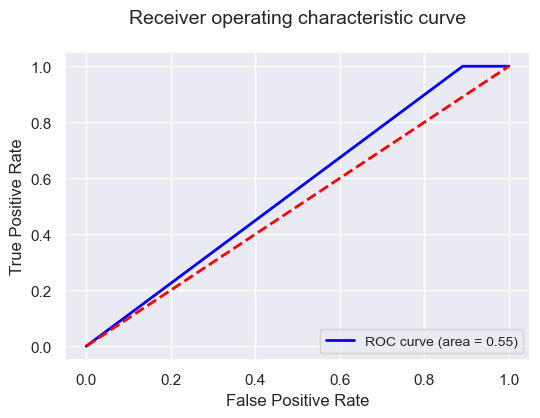

In [134]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(y_test, Y_pred_lor)

# calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# create the ROC curve plot
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver operating characteristic curve\n', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.show()

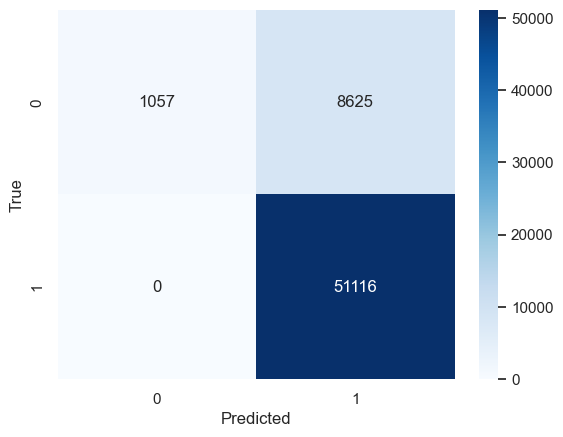

In [136]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# predict on test set
Y_pred_lor=LR.predict(x_test)

# create confusion matrix
cm = confusion_matrix(y_test, Y_pred_lor)

# plot confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [138]:
# now choose model and fitt that  model
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion="entropy" , random_state=42)
start_time=time.time()
DT.fit(x_train , y_train)
end_time=time.time()

training_time=end_time - start_time
print("time complexity :{:.3f} ".format(training_time))
DT.score(x_train, y_train)


Y_pred_dt=DT.predict(x_test)
print(Y_pred_dt)

ytrain_pred=DT.predict(x_train)
print("accuracy  train time random DecisionTreeClassifier   ",accuracy_score(y_train, ytrain_pred))
print("accuracy  test time in DecisionTreeClassifier   ",accuracy_score(y_test, Y_pred_dt))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test , Y_pred_dt)
print(cm)

time complexity :0.142 
[0 1 1 ... 0 1 1]
accuracy  train time random DecisionTreeClassifier    1.0
accuracy  test time in DecisionTreeClassifier    1.0
[[ 9682     0]
 [    0 51116]]


In [140]:
print(classification_report(y_test, Y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9682
           1       1.00      1.00      1.00     51116

    accuracy                           1.00     60798
   macro avg       1.00      1.00      1.00     60798
weighted avg       1.00      1.00      1.00     60798



In [142]:
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


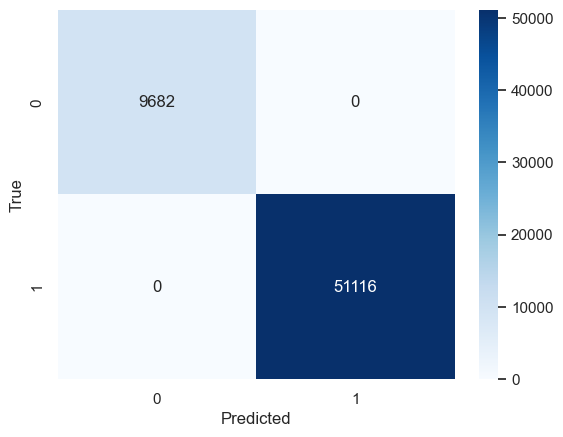

In [144]:
# plot confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()